## Import the data

In [5]:
# Import packages
import pandas as pd
import numpy as np

# defining column names
column_names = [
  "age",
  "workclass",
  "fnlwgt",
  "education",
  "education_num",
  "marital_status",
  "occupation",
  "relationship",
  "race",
  "sex",
  "capital_gain",
  "capital_loss",
  "hours_per_week",
  "native_country",
  "income"]

# read in data, set n/a values to "?"
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names = column_names, na_values="?", sep=r'\s*,\s*',)
# preview dataset 
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Preprocessing 

In [6]:
#change type to category
df['workclass'] = df['workclass'].astype('category')
df['education'] = df['education'].astype('category')
df['marital_status'] = df['marital_status'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['relationship'] = df['relationship'].astype('category')
df['race'] = df['race'].astype('category')
df['sex'] = df['sex'].astype('category')
df['native_country'] = df['native_country'].astype('category')
df['income'] = df['income'].astype('category')

#encoding the field into a new column
df["cat_workclass"] = df["workclass"].cat.codes
df["cat_education"] = df["education"].cat.codes
df["cat_marital_status"] = df["marital_status"].cat.codes
df["cat_occupation"] = df["occupation"].cat.codes
df["cat_relationship"] = df["relationship"].cat.codes
df["cat_race"] = df["race"].cat.codes
df["cat_sex"] = df["sex"].cat.codes
df["cat_native_country"] = df["native_country"].cat.codes
df["cat_income"] = df["income"].cat.codes

In [7]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,cat_workclass,cat_education,cat_marital_status,cat_occupation,cat_relationship,cat_race,cat_sex,cat_native_country,cat_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,6,9,4,0,1,4,1,38,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,5,9,2,3,0,4,1,38,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,3,11,0,5,1,4,1,38,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,3,1,2,5,0,2,1,38,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,3,9,2,9,5,2,0,4,0


## Split the dataset into Training and Test Sets

In [8]:
# splitting data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# define features 
features = ['cat_workclass', 'cat_education', 'cat_marital_status', 
            'cat_occupation', 'cat_relationship', 'cat_race', 'cat_sex', 
            'cat_native_country', 
            'age', 'education_num', 'capital_gain', 'capital_loss', 
            'hours_per_week']

X = df[features].values

# define target
y = df["cat_income"]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Train the model and create test predictions

In [10]:
# train the model using RandomForrest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
# predict 
y_predict = model.predict(X_test)

In [14]:
# caluclate the accurary of our model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8498310983724024

## Analyze model metrics 

In [18]:
# Summary statistics on the model's performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7407
           1       0.72      0.63      0.67      2362

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.79      9769
weighted avg       0.84      0.85      0.85      9769



## Accuracy, precision, and recall

In [21]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[6815,  592],
       [ 875, 1487]])

In [22]:
pd.DataFrame(
    cm,
    columns=['Predicted <=50K', 'Predicted >50K'],
    index=['True <=50K', 'True >50K']
)

,Predicted <=50K,Predicted >50K
True <=50K,6815,592
True >50K,875,1487


## ROC curve

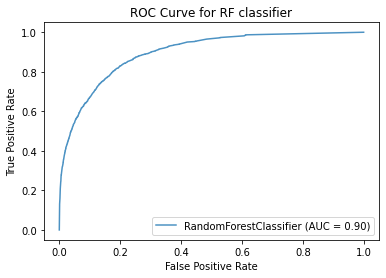

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
curve = plot_roc_curve(model, X_test, y_test, ax=ax, alpha=0.8)
plt.title('ROC Curve for RF classifier')
plt.show()

Text(0.5, 1.0, 'PR Curve for RF classifier')

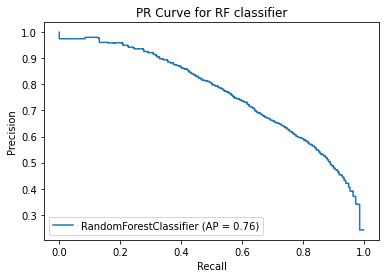

In [27]:
from sklearn.metrics import plot_precision_recall_curve

ax = plt.gca()
disp = plot_precision_recall_curve(model, X_test, y_test, ax=ax)
plt.title('PR Curve for RF classifier')
                                   